<a href="https://colab.research.google.com/github/pingstech/ZeroToHero-ML/blob/main/Breast_Cancer_Diagnosis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# COLAB'ın Drive'da olan verilerimize erişebilmesi için çalıştırdığımız kod

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Gerekli erişim iznini verdikten sonra ödev için kullanılacak veri setinin ismini belirtiyoruz

from google.colab import files
file_id = "1UU5f-omX_Xt1X0M97hpOcWICMOacl3_S"         # Paylaşım kodu
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("myDataset.csv")   # Dosya ismi

In [ ]:
# Gerekli kütüphanelerin kurulması

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier      #KNN
from sklearn.linear_model import LogisticRegression     #Logistic Regression
from sklearn.tree import DecisionTreeClassifier         #Decision Tree
from sklearn.ensemble import RandomForestClassifier     #Random Forest
from sklearn.svm import SVC                             #SVM
from sklearn.calibration import CalibratedClassifierCV  #SVM modeli kalibrasyonu için
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [ ]:
data=pd.read_csv("myDataset.csv")
df=data.copy()

In [ ]:
# Veri setimizi oluşturan featureları görüntüleyelim

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [ ]:
# Verisetimizin ilk 10 verisini inceleyelim

df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


In [ ]:
# İşimize yaramayacak olan gereksiz featureları verimizden çıkartalım

df = df.drop(['Patient_ID','Date_of_Surgery','Date_of_Last_Visit'],axis=1)

In [ ]:
""" 
      Veri setinin içindeki boş olan ve değer atanmamış olan kısımları bulup 
      her feature altında kaç tane olduğunu gösteriyoruz 
"""

df.isnull().sum()

Age                7
Gender             7
Protein1           7
Protein2           7
Protein3           7
Protein4           7
Tumour_Stage       7
Histology          7
ER status          7
PR status          7
HER2 status        7
Surgery_type       7
Patient_Status    20
dtype: int64

In [ ]:
# Benzer olan verilerin kaç tane olduğunu bulalım

df.duplicated().sum()

6

In [ ]:
# Benzer olan verileri seçelim

df.loc[df.duplicated(keep=False),:]

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Benzer olan verileri, veri setimizden silelim

df.drop_duplicates(keep='first',inplace=True)
df.shape

(335, 13)

In [ ]:
""" 
      Veri setinin içindeki boş olan ve değer atanmamış olan kısımları bulup 
      her feature altında kaç tane olduğunu gösteriyoruz 
"""

df.isnull().sum()

Age                1
Gender             1
Protein1           1
Protein2           1
Protein3           1
Protein4           1
Tumour_Stage       1
Histology          1
ER status          1
PR status          1
HER2 status        1
Surgery_type       1
Patient_Status    14
dtype: int64

In [ ]:
"""
      Burada ise ileride algoritmamızı düzgün çalıştırabilmek için
      belirtilmemiş değerleri veri setimizden kaldırıyoruz.
"""

df=df.dropna()

In [ ]:
# Tekrardan Null değer var mı diye kontrol edelim

df.isnull().sum()

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


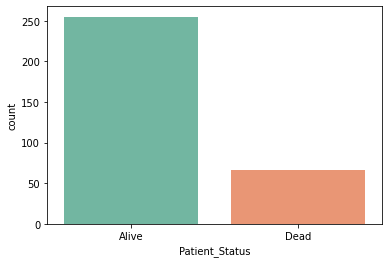

In [ ]:
# Seaborn sayesinde veri setimizde yaşayan ve ölü olan hastaları görüntüledik

sns.countplot(df['Patient_Status'],label="Count",palette="Set2")

**Burada göründüğü üzere yaşayan sayısı ile ölen sayısı arasında çok büyük fark var. Bundan dolayı makine öğrenmesi algoritmamızı bu şekilde çalıştırdığımızda yanlış sonuçlar elde edeceğiz!**

In [ ]:
# Yaşayan ve ölü olan hastaların sayısını bulup daha sonra yaşayan ve ölüleri iki ayrı değişkene atayalım

count_Alive,count_Dead=df['Patient_Status'].value_counts()

df_Alive=df[df['Patient_Status']=='Alive']
df_Dead= df[df['Patient_Status']=='Dead']

print(count_Alive)
print(count_Dead)

255
66


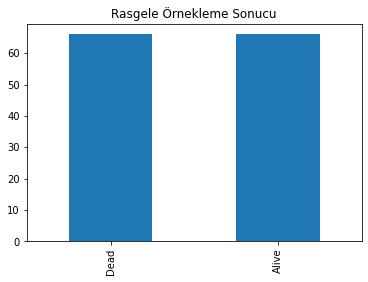

In [ ]:
# Yaşayan ve ölü hasta sayısını random bir biçimde eşitleyeceğiz

df_Alive_temp=df_Alive.sample(count_Dead,random_state=42)    # Ölü kadar yaşayan sayısını örnekledik
df_temp=pd.concat([df_Alive_temp,df_Dead], axis=0)           # Yeni yaşayan sayısını ölü sayısı ile birleştirdik

df_temp['Patient_Status'].value_counts().plot(kind='bar', title='Rasgele Örnekleme Sonucu');

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


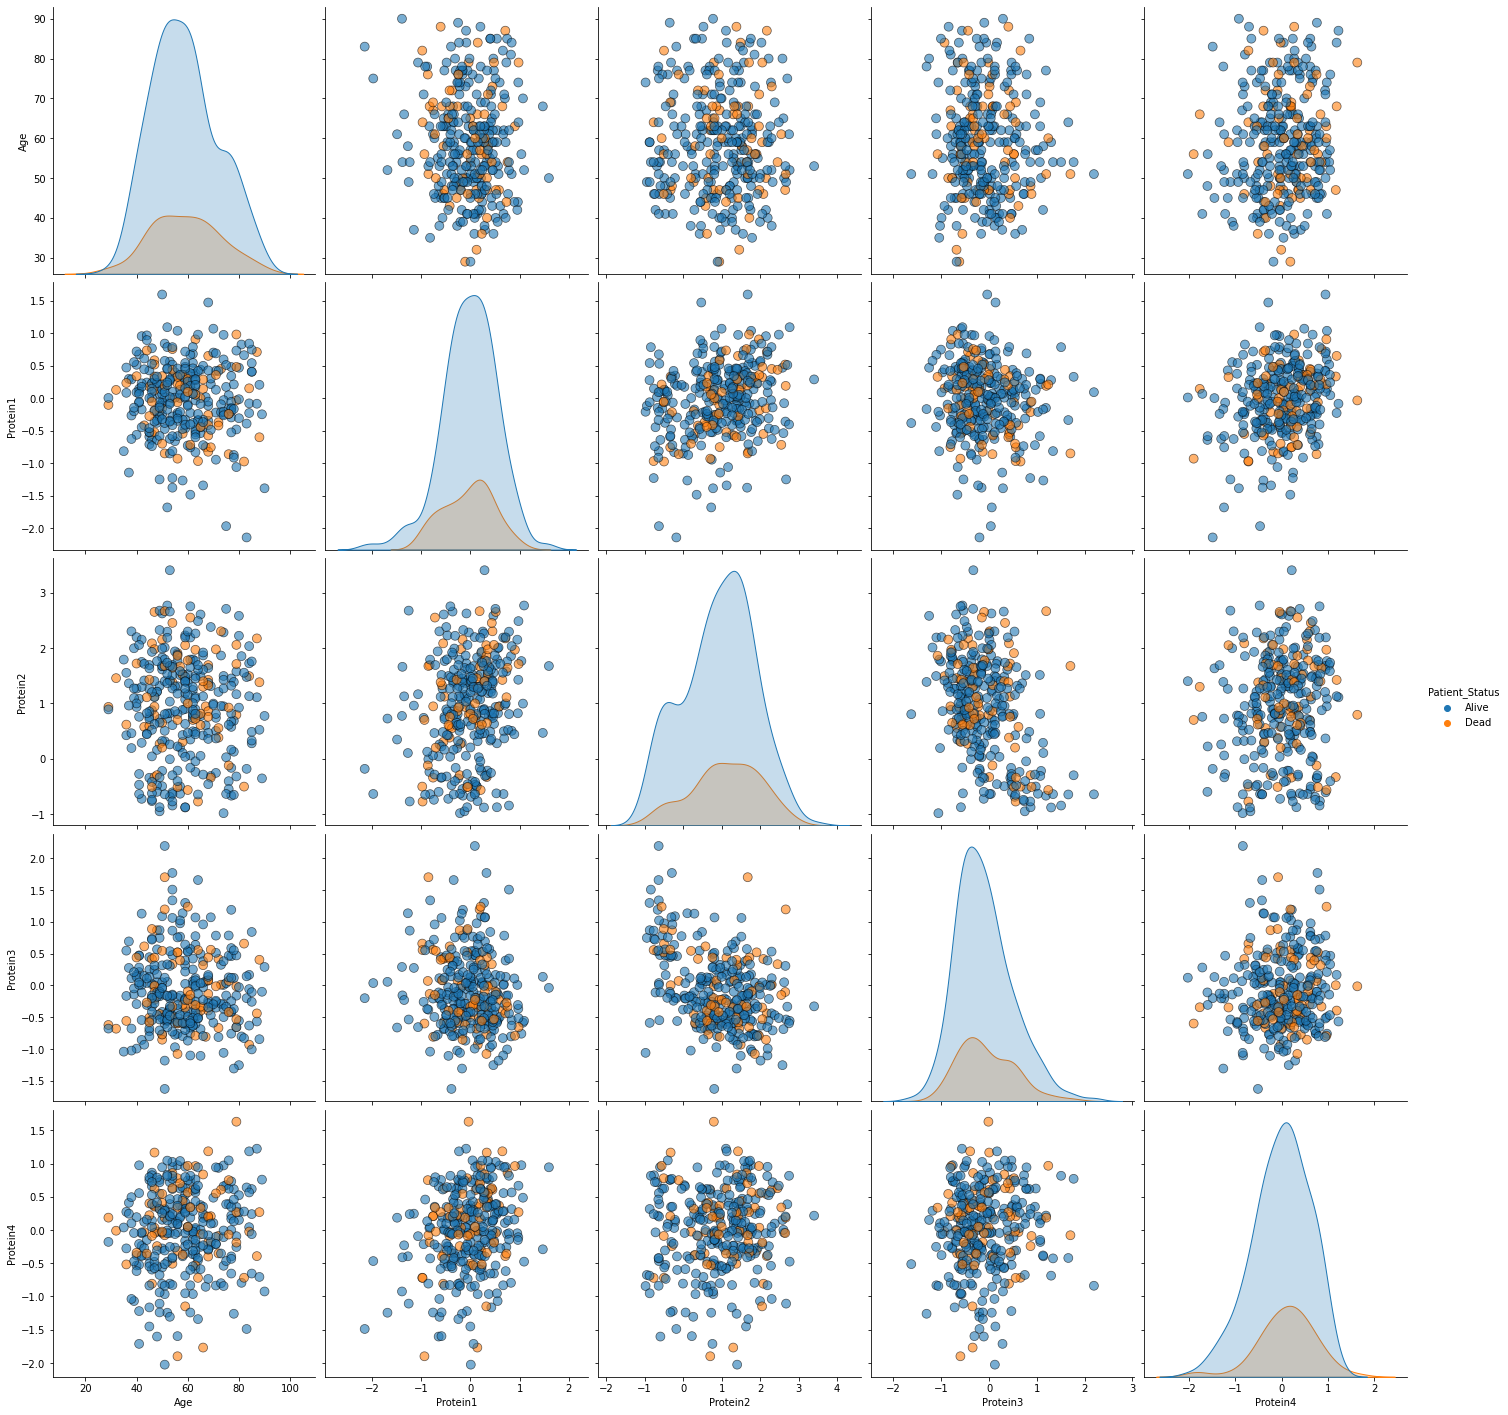

In [ ]:
sns.pairplot(df, hue = 'Patient_Status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [ ]:
"""
    Bu fonksiyon ile işimize yarayacak olan string değişkenleri sayısal değerlere çeviriyoruz
    NaN type olan verileri siliyoruz
"""


def encoding(df):
    code = {'FEMALE':0,
            'MALE':1,
            'III':3,
            'II':2,
            'I':1,
            'Infiltrating Ductal Carcinoma':0,
            'Mucinous Carcinoma':1,
            'Infiltrating Lobular Carcinoma':2,
            'Negative':0,
            'Positive':1,
            'Modified Radical Mastectomy':0,
            'Lumpectomy':1,
            'Simple Mastectomy':2,
            'Other':3,
            'Alive':1,
            'Dead':0
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
    return df

def imputation(df):
    df = df.fillna(df.median())
    df = df.dropna()
    return df

def feature_engineering(df):
    useless_columns = ['Patient_ID','Date_of_Surgery','Date_of_Last_Visit','ER status','PR status']
    df = df.drop(useless_columns,axis=1)
    return df

def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('Patient_Status',axis=1)
    y = df['Patient_Status']    

    return df,X,y

In [ ]:
df = data.copy()
df,X,y=preprocessing(df)

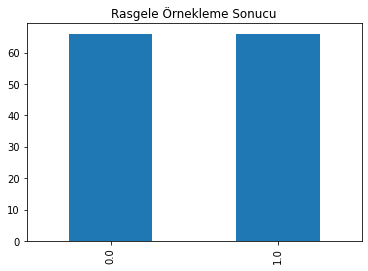

In [ ]:
# Yukarıdaki işlem sonunda tüm değerlerimiz sayısal değerlere döndü

count_Alive,count_Dead=df['Patient_Status'].value_counts()

df_Alive=df[df['Patient_Status']==1]
df_Dead= df[df['Patient_Status']==0]

df_Alive_temp=df_Alive.sample(count_Dead,random_state=42)    # Ölü kadar yaşayan sayısını örnekledik
df_temp=pd.concat([df_Alive_temp,df_Dead], axis=0)           # Yeni yaşayan sayısını ölü sayısı ile birleştirdik

df_temp['Patient_Status'].value_counts().plot(kind='bar', title='Rasgele Örnekleme Sonucu');

In [ ]:
# Modelimizi elde edebilmek için verilerimizi kullanarak eğiteceğiz

""" Elimizde olan tüm verilerin %80'ini eğitim için 
    geri kalan %20'lik kısmını ise test için kullanıyoruz 
"""

trainset,testset=train_test_split(df_temp,test_size=0.2,random_state=42)    # Random state olması için her seferinde aynı sonuç çıkmasını istediğimizden dolayı

In [ ]:
trainX=trainset.drop(['Patient_Status'],axis=1)
trainY=trainset['Patient_Status']
testX=testset.drop(['Patient_Status'],axis=1)
testY=testset['Patient_Status']

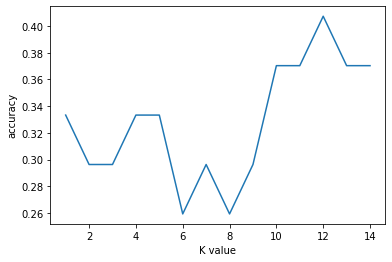

In [ ]:
""" KNN modelin oluşturuken kullanacağımız en iyi "k" değerini bulmamız gerekiyor. 
    Önce bir grafikte her "k" değeri için doğruluklarını kontrol edeceğiz ve 
    uygun olan "k" değerini modelimiz için kullanacağız. 
"""

scoreList=[] # Tüm doğruluk değerlerini sakalayacağımız bir liste oluşturduk

for temp in range(1,15): 
  KNN=KNeighborsClassifier(n_neighbors=temp) 
  KNN.fit(trainX,trainY) 
  scoreList.append(KNN.score(testX,testY))

plt.plot(range(1,15),scoreList)
plt.xlabel("K value")
plt.ylabel("accuracy")
plt.show()

In [ ]:
# KNN Modelin Oluşturulması

knnModel=KNeighborsClassifier(n_neighbors=12)
knnModel.fit(trainX,trainY)
knnPrediction=knnModel.predict(testX)
print("KNN Score:",knnModel.score(testX,testY))

KNN Score: 0.4074074074074074


              precision    recall  f1-score   support

         0.0       0.33      0.78      0.47         9
         1.0       0.67      0.22      0.33        18

    accuracy                           0.41        27
   macro avg       0.50      0.50      0.40        27
weighted avg       0.56      0.41      0.38        27



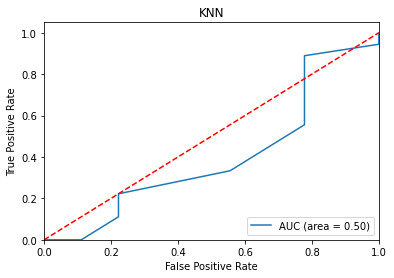

In [ ]:
#   KNN AUC Score

print(classification_report(testY,knnPrediction))
logit_roc_auc=roc_auc_score(testY,knnModel.predict(testX))
fpr,tpr,thresholds=roc_curve(testY,knnModel.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# SVM Modelin Oluşturulması

svmModel=SVC(random_state=0)
svmModel.fit(trainX,trainY)
svmPrediction=svmModel.predict(testX)


print("SVM Score ",svmModel.score(testX,testY))

SVM Score  0.3333333333333333


In [ ]:
# SVM Model'ın AUC score'u çizdirebilmek için calibre ediyoruz

svmModel=SVC()
clf=CalibratedClassifierCV(svmModel)
clf.fit(trainX,trainY)
CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr',degree=3,gamma='auto',kernel='rbf',
  max_iter=-1,probability=False,random_state=None,shrinking=True,
  tol=0.001,verbose=False),
            cv=3, method='sigmoid')
clf.predict_proba(testX)

array([[0.57263564, 0.42736436],
       [0.52538761, 0.47461239],
       [0.50675936, 0.49324064],
       [0.51265439, 0.48734561],
       [0.55220041, 0.44779959],
       [0.53361487, 0.46638513],
       [0.51933864, 0.48066136],
       [0.53000673, 0.46999327],
       [0.56467965, 0.43532035],
       [0.51635488, 0.48364512],
       [0.50686853, 0.49313147],
       [0.55651221, 0.44348779],
       [0.53534057, 0.46465943],
       [0.5331748 , 0.4668252 ],
       [0.51828447, 0.48171553],
       [0.58125874, 0.41874126],
       [0.51558083, 0.48441917],
       [0.52973535, 0.47026465],
       [0.54083451, 0.45916549],
       [0.58340792, 0.41659208],
       [0.52777653, 0.47222347],
       [0.54337573, 0.45662427],
       [0.50822262, 0.49177738],
       [0.51396082, 0.48603918],
       [0.49431679, 0.50568321],
       [0.56965011, 0.43034989],
       [0.5416788 , 0.4583212 ]])


              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         9
         1.0       0.00      0.00      0.00        18

    accuracy                           0.33        27
   macro avg       0.17      0.50      0.25        27
weighted avg       0.11      0.33      0.17        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


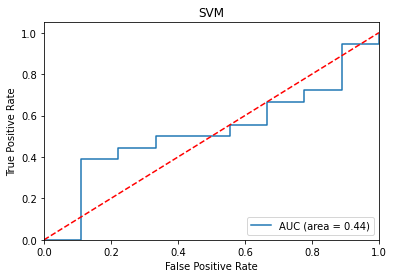

In [ ]:
#   SVM AUC Score

print("\n"+classification_report(testY,svmPrediction))
logit_roc_auc=roc_auc_score(testY,clf.predict(testX))
fpr,tpr,thresholds=roc_curve(testY,clf.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Decision Tree Modelin Oluşturulması

dtModel=DecisionTreeClassifier()
dtModel.fit(trainX,trainY)
dtPrediction=dtModel.predict(testX)


print("Decision Tree score:",dtModel.score(testX,testY))

Decision Tree score: 0.4444444444444444


              precision    recall  f1-score   support

         0.0       0.31      0.56      0.40         9
         1.0       0.64      0.39      0.48        18

    accuracy                           0.44        27
   macro avg       0.47      0.47      0.44        27
weighted avg       0.53      0.44      0.46        27



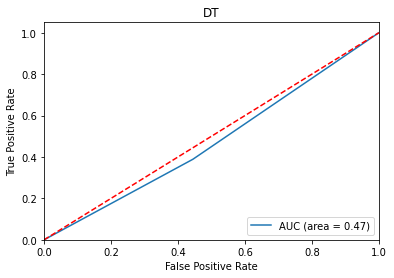

In [ ]:
#   Decision Tree AUC Score
print(classification_report(testY,dtPrediction))

logit_roc_auc=roc_auc_score(testY,dtModel.predict(testX))
fpr,tpr,thresholds=roc_curve(testY,dtModel.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Random Forest Modelinin Oluşturulması

rf100=RandomForestClassifier(n_estimators=100,random_state=42)
rf100.fit(trainX,trainY)
rf100Prediction=rf100.predict(testX)


print("Random Forest with 100 Decision Tree score:",rf100.score(testX,testY))

Random Forest with 100 Decision Tree score: 0.48148148148148145


              precision    recall  f1-score   support

         0.0       0.35      0.67      0.46         9
         1.0       0.70      0.39      0.50        18

    accuracy                           0.48        27
   macro avg       0.53      0.53      0.48        27
weighted avg       0.58      0.48      0.49        27



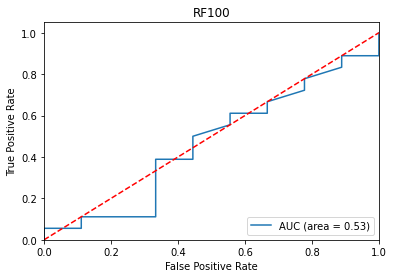

In [ ]:
#   Random Forest with 100 Decision Tree AUC Score

print(classification_report(testY,rf100Prediction))

logit_roc_auc=roc_auc_score(testY, rf100.predict(testX))
fpr, tpr,thresholds=roc_curve(testY,rf100.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF100')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Random Forest Modelinin Oluşturulması

rf50=RandomForestClassifier(n_estimators=50,random_state=42)
rf50.fit(trainX,trainY)
rf50Prediction=rf50.predict(testX)


print("Random Forest with 50 Decision Tree score:",rf50.score(testX,testY))

Random Forest with 50 Decision Tree score: 0.4074074074074074


              precision    recall  f1-score   support

         0.0       0.29      0.56      0.38         9
         1.0       0.60      0.33      0.43        18

    accuracy                           0.41        27
   macro avg       0.45      0.44      0.41        27
weighted avg       0.50      0.41      0.41        27



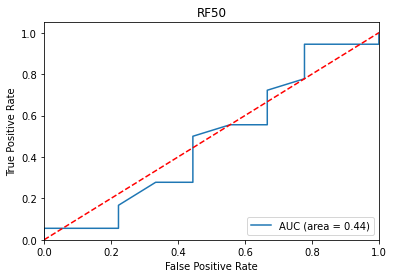

In [ ]:
#   Random Forest with 50 Decision Tree AUC Score

print(classification_report(testY,rf50Prediction))

logit_roc_auc=roc_auc_score(testY, rf50.predict(testX))
fpr,tpr,thresholds=roc_curve(testY, rf50.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF50')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()